In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('./diabetes.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

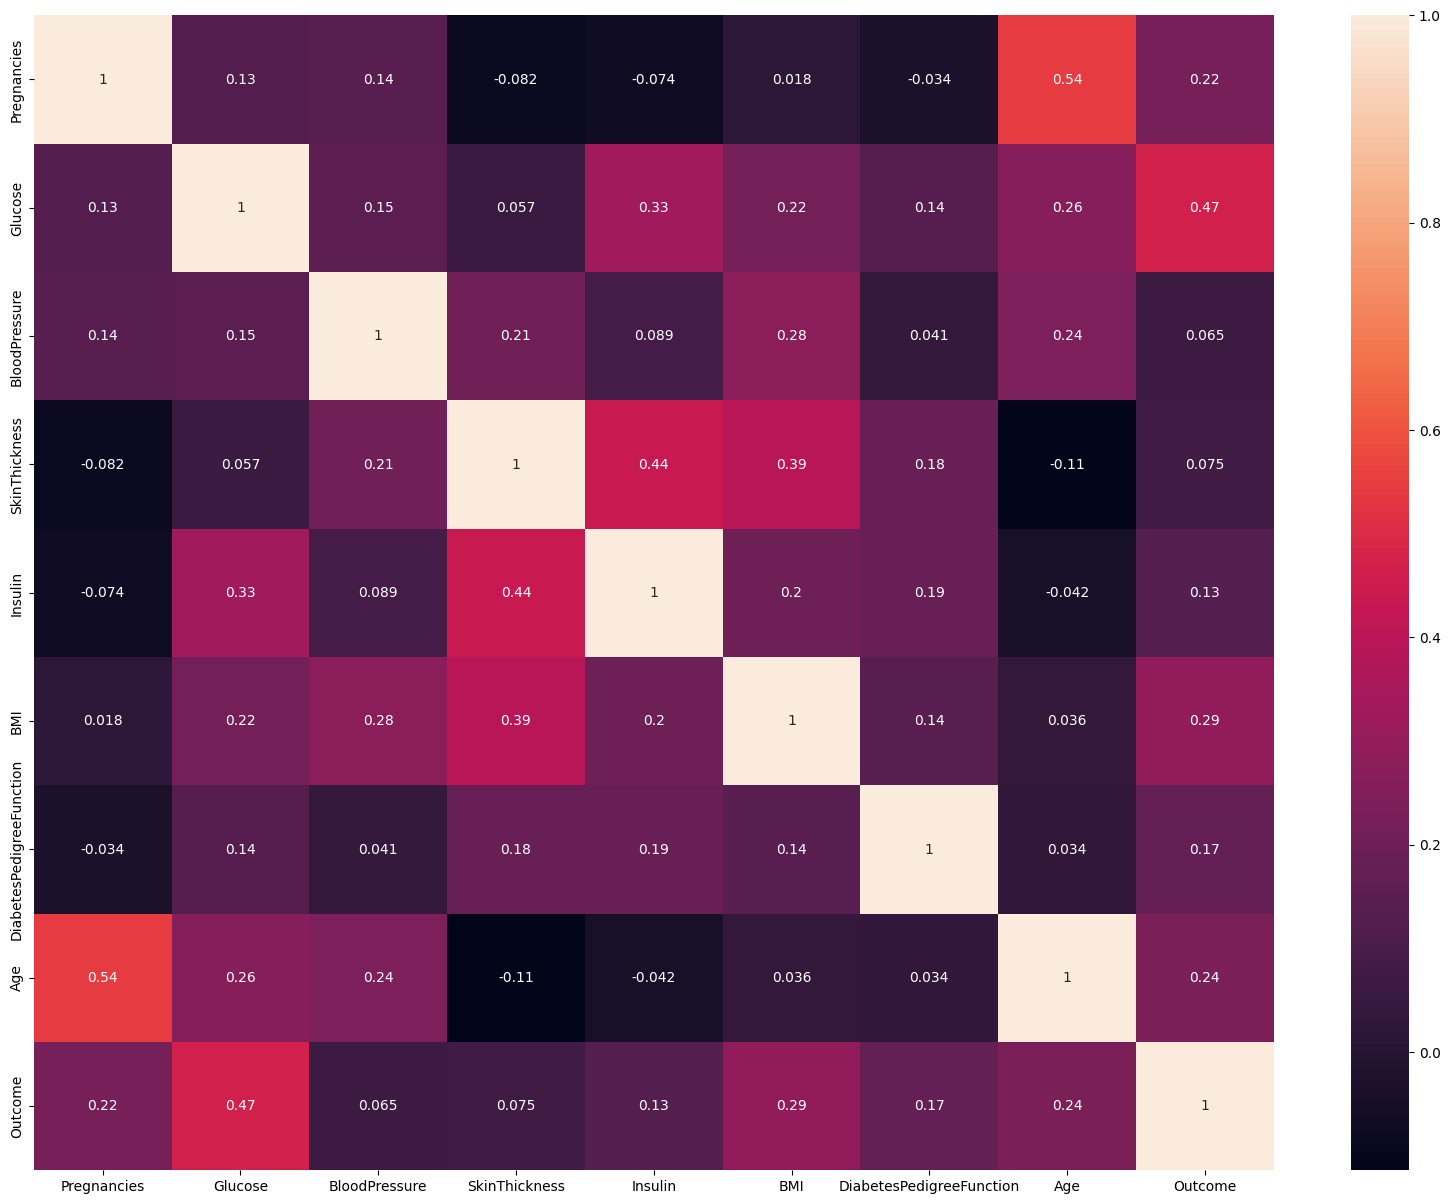

In [5]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
x = df.iloc[:,:-1]
y = df['Outcome']

In [8]:
ss = StandardScaler()
x = pd.DataFrame(ss.fit_transform(x),columns=x.columns)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### using seperate models for predicting the data

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [14]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_train, y_train), lr.score(x_test, y_test)

(0.7703583061889251, 0.7532467532467533)

In [ ]:
svc = SVC()
svc.fit(x_train, y_train)
svc.score(x_train, y_train), svc.score(x_test, y_test)

(0.8289902280130294, 0.7272727272727273)

In [49]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(x_train, y_train)
knn.score(x_train, y_train), knn.score(x_test, y_test)

(0.760586319218241, 0.7662337662337663)

In [51]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=2)
dtc.fit(x_train, y_train)
dtc.score(x_train, y_train), dtc.score(x_test, y_test)

(0.7719869706840391, 0.7727272727272727)

## using ensemble ml method for reducting the overfitting

In [53]:
from sklearn.ensemble import VotingClassifier

In [109]:
li = [('lr',LogisticRegression()),('knn',KNeighborsClassifier(n_neighbors=19)),('dtc',DecisionTreeClassifier(criterion='entropy',max_depth=3))]
vc = VotingClassifier(estimators=li)
vc.fit(x_train, y_train)

,estimators,"[('lr', ...), ('knn', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [110]:
vc.score(x_train, y_train), vc.score(x_test, y_test)

(0.7882736156351792, 0.7857142857142857)

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=3)
rfc.fit(x_train, y_train)
rfc.score(x_train, y_train), rfc.score(x_test, y_test)

(0.7931596091205212, 0.7922077922077922)

In [141]:
num = 16
data = x_test.tail(num).iloc[:-num+1]
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,0.936914,0.910918,0.459827,0.530902,0.401154,0.407084,0.6648,1.766346


In [142]:
y_test.tail(num).iloc[:-num+1]

603    1
Name: Outcome, dtype: int64

In [143]:
vc.predict(data), rfc.predict(data) 

(array([1]), array([1]))

In [144]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [145]:
cf = confusion_matrix(y_test, vc.predict(x_test))
cf

array([[86, 13],
       [20, 35]])

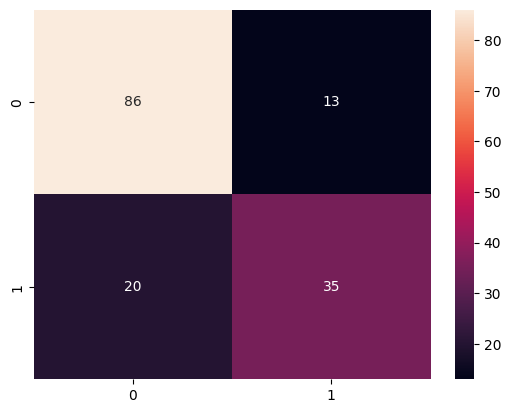

In [146]:
sns.heatmap(cf,annot=True)
plt.show()

In [149]:
precision_score(y_test, vc.predict(x_test)), recall_score(y_test,vc.predict(x_test))

(0.7291666666666666, 0.6363636363636364)

In [147]:
cf1 = confusion_matrix(y_test, rfc.predict(x_test))
cf1

array([[90,  9],
       [23, 32]])

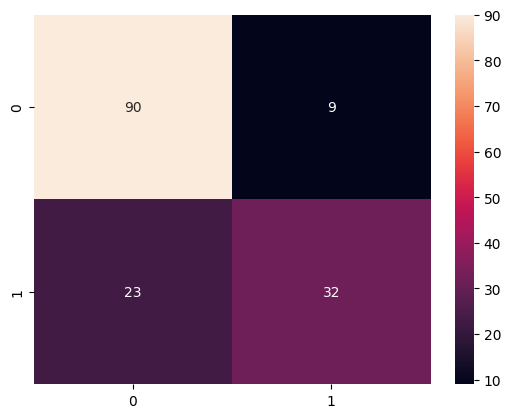

In [148]:
sns.heatmap(cf1,annot=True)
plt.show()

In [150]:
precision_score(y_test, rfc.predict(x_test)), recall_score(y_test, rfc.predict(x_test))

(0.7804878048780488, 0.5818181818181818)

## dumping the random forest classifier model for future use

In [161]:
import joblib
joblib.dump(rfc,'./rfc_model.joblib')
joblib.dump(vc,'./vc_model.joblib')

['./vc_model.joblib']